# objective: Use python to examine historical financial ratio data data set to establish which financial ratios are related to the risk of bankruptcy
used data on financals data and bankruptcy events to determine 1) which ratios are most explanitory in predicting default and 2) the percentage the ratios with most explaintory fall to when bancruptcy likly and the percentage when bankrupcy is not likly. 

# Steps in process:
1) improt data
2) Preperation - read data: shape, head, missing values, data types, outliers
4) Analysis - import relevant data science functions: numpy, pandas, matplotlib and apply analysis
5) Visulisation - plot data: observer ratios for the different companies and where they are associate with default or not.
6) Insights - observations and insights from analysis
7) Machine Learning - additional data points or analysts which could be carried out

# 1 data imparoted from kaggle: 

data used from taiwan bankruptcy data and related finance data.fine downloaded from https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction
and uploaded as data.csv to workspace in datacapm entitield Data in Finance_Predictors of Bankruptcy. Once uploaded it is availabe to convert to a data frame object.


In [1]:
import pandas as pd

Financial_data = pd.read_csv("data.csv")

# 1 Import Relevant Data Science Functions

In [2]:
# numby and  pandas for data manipulation
import numpy as np
import pandas as pd
# matplotlib and seaborn for platting
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Prepreation - Read Data


Integers used to calculate ratios, such as divided function / or + function . 
Data set is already in ratio format so intigers alread used to calculate ratios from raw financial data. 

In [3]:
# read data to examine its contents. 
print(Financial_data.head())
print(Financial_data.shape)
print(Financial_data.info())
print(Financial_data.columns)
print(Financial_data.describe())

   Bankrupt?  ...   Equity to Liability
0          1  ...              0.016469
1          1  ...              0.020794
2          1  ...              0.016474
3          1  ...              0.023982
4          1  ...              0.035490

[5 rows x 96 columns]
(6819, 96)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Real

In [4]:
#import data into dataframe format
import pandas as pd

df = pd.read_csv("data.csv")
df.head()
df.info()
df.shape
df.columns
df.describe()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Bankrupt?  ...   Equity to Liability
0             1  ...              0.016469
1             1  ...              0.020794
2             1  ...              0.016474
3             1  ...              0.023982
4             1  ...              0.035490
...         ...  ...                   ...
6814          0  ...              0.029890
6815          0  ...              0.038284
6816          0  ...              0.097649
6817          0  ...              0.044009
6818          0  ...              0.233902

[6819 rows x 96 columns]

3 Analysis

In [5]:
#isolate bankruptcy data
# values in bankruptcy
df["Bankrupt?"].value_counts()


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [6]:
# percentage in bankruptcy
df["Bankrupt?"].value_counts(normalize=True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

In [7]:
# bankruptcy data via a boolean index in df holding the variable bankruptcy constant ie bankrupt  = 1 if yes
df[df["Bankrupt?"] == 1]


Bankrupt?  ...   Equity to Liability
0             1  ...              0.016469
1             1  ...              0.020794
2             1  ...              0.016474
3             1  ...              0.023982
4             1  ...              0.035490
...         ...  ...                   ...
6591          1  ...              0.015620
6640          1  ...              0.003946
6641          1  ...              0.011797
6642          1  ...              0.011777
6728          1  ...              0.022209

[220 rows x 96 columns]

In [8]:
# descriptive data on bankruptcy via a boolean index in df holding the variable bankruptcy constant ie bankrupt  = 1 if yes
df[df["Bankrupt?"] == 1].mean()


Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest    0.418503
 ROA(A) before interest and % after tax                     0.456947
 ROA(B) before interest and depreciation after tax          0.461483
 Operating Gross Margin                                     0.598670
                                                              ...   
 Liability to Equity                                        0.293578
 Degree of Financial Leverage (DFL)                         0.028443
 Interest Coverage Ratio (Interest expense to EBIT)         0.564959
 Net Income Flag                                            1.000000
 Equity to Liability                                        0.024832
Length: 96, dtype: float64

In [9]:
# descriptive data on bankruptcy via a boolean index in df holding the variable bankruptcy constant ie bankrupt  = 1 if yes
df[df["Bankrupt?"] == 1].describe()

Bankrupt?  ...   Equity to Liability
count      220.0  ...            220.000000
mean         1.0  ...              0.024832
std          0.0  ...              0.054424
min          1.0  ...              0.003946
25%          1.0  ...              0.015828
50%          1.0  ...              0.018662
75%          1.0  ...              0.022721
max          1.0  ...              0.798122

[8 rows x 96 columns]

In [10]:
# descriptive data on non-bankruptcy via a boolean index in df holding the variable bankruptcy constant ie bankrupt  = o if not bankrupt
df[df["Bankrupt?"] == 0].describe()

Bankrupt?  ...   Equity to Liability
count     6599.0  ...           6599.000000
mean         0.0  ...              0.048337
std          0.0  ...              0.049685
min          0.0  ...              0.000000
25%          0.0  ...              0.025056
50%          0.0  ...              0.034486
75%          0.0  ...              0.053831
max          0.0  ...              1.000000

[8 rows x 96 columns]

In [11]:
# descriptive data on non-bankruptcy via a boolean index in df holding the variable bankruptcy constant ie bankrupt  = o if not bankrupt
df[df["Bankrupt?"] == 0].mean()

Bankrupt?                                                   0.000000
 ROA(C) before interest and depreciation before interest    0.508069
 ROA(A) before interest and % after tax                     0.562015
 ROA(B) before interest and depreciation after tax          0.556659
 Operating Gross Margin                                     0.608257
                                                              ...   
 Liability to Equity                                        0.279925
 Degree of Financial Leverage (DFL)                         0.027511
 Interest Coverage Ratio (Interest expense to EBIT)         0.565371
 Net Income Flag                                            1.000000
 Equity to Liability                                        0.048337
Length: 96, dtype: float64

In [12]:
# Calculate the mean of each variable if bankruptcy or not bankruptcy
df_bankrupt_mean = df[df["Bankrupt?"] == 1].mean()
df_non_bankrupt_mean = df[df["Bankrupt?"] == 0].mean()

# Calculate the percentage difference between the means
percent_variance = (df_bankrupt_mean - df_non_bankrupt_mean) / df_non_bankrupt_mean * 100

# Add the percent_variance column to the dataframe
df["Percent variance"] = percent_variance

df

Bankrupt?  ...  Percent variance
0             1  ...               NaN
1             1  ...               NaN
2             1  ...               NaN
3             1  ...               NaN
4             1  ...               NaN
...         ...  ...               ...
6814          0  ...               NaN
6815          0  ...               NaN
6816          0  ...               NaN
6817          0  ...               NaN
6818          0  ...               NaN

[6819 rows x 97 columns]

In [13]:
# Group by "Bankrupt?" and calculate the mean for each variable
dfmean = df.groupby("Bankrupt?").mean()
dfmean

ROA(C) before interest and depreciation before interest  ...  Percent variance
Bankrupt?                                                            ...                  
0                                                   0.508069         ...               NaN
1                                                   0.418503         ...               NaN

[2 rows x 96 columns]

In [14]:
#percentage difference between 2 means
dfmean_Pct = dfmean.pct_change()
dfmean_Pct


ROA(C) before interest and depreciation before interest  ...  Percent variance
Bankrupt?                                                            ...                  
0                                                        NaN         ...               NaN
1                                                  -0.176287         ...               NaN

[2 rows x 96 columns]

In [15]:
#transpose data
transposed_dfmean_Pct = dfmean_Pct.transpose()
# remove null column
transposed_dfmean_Pct.drop(0, axis=1, inplace=True)
transposed_dfmean_Pct.columns =['Ratio']
transposed_dfmean_Pct

Ratio
 ROA(C) before interest and depreciation before... -0.176287
 ROA(A) before interest and % after tax            -0.186949
 ROA(B) before interest and depreciation after tax -0.170977
 Operating Gross Margin                            -0.015761
 Realized Sales Gross Margin                       -0.015651
...                                                      ...
 Degree of Financial Leverage (DFL)                 0.033867
 Interest Coverage Ratio (Interest expense to E... -0.000729
 Net Income Flag                                    0.000000
 Equity to Liability                               -0.486275
Percent variance                                         NaN

[96 rows x 1 columns]

4 Visulisation

<AxesSubplot: xlabel='Bankrupt?', ylabel='count'>

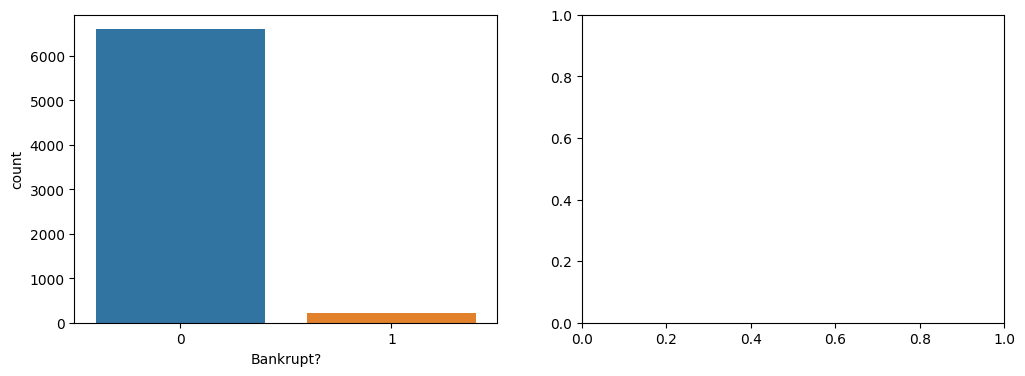

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x="Bankrupt?", data=df, ax=axes[0])

4 plot the data


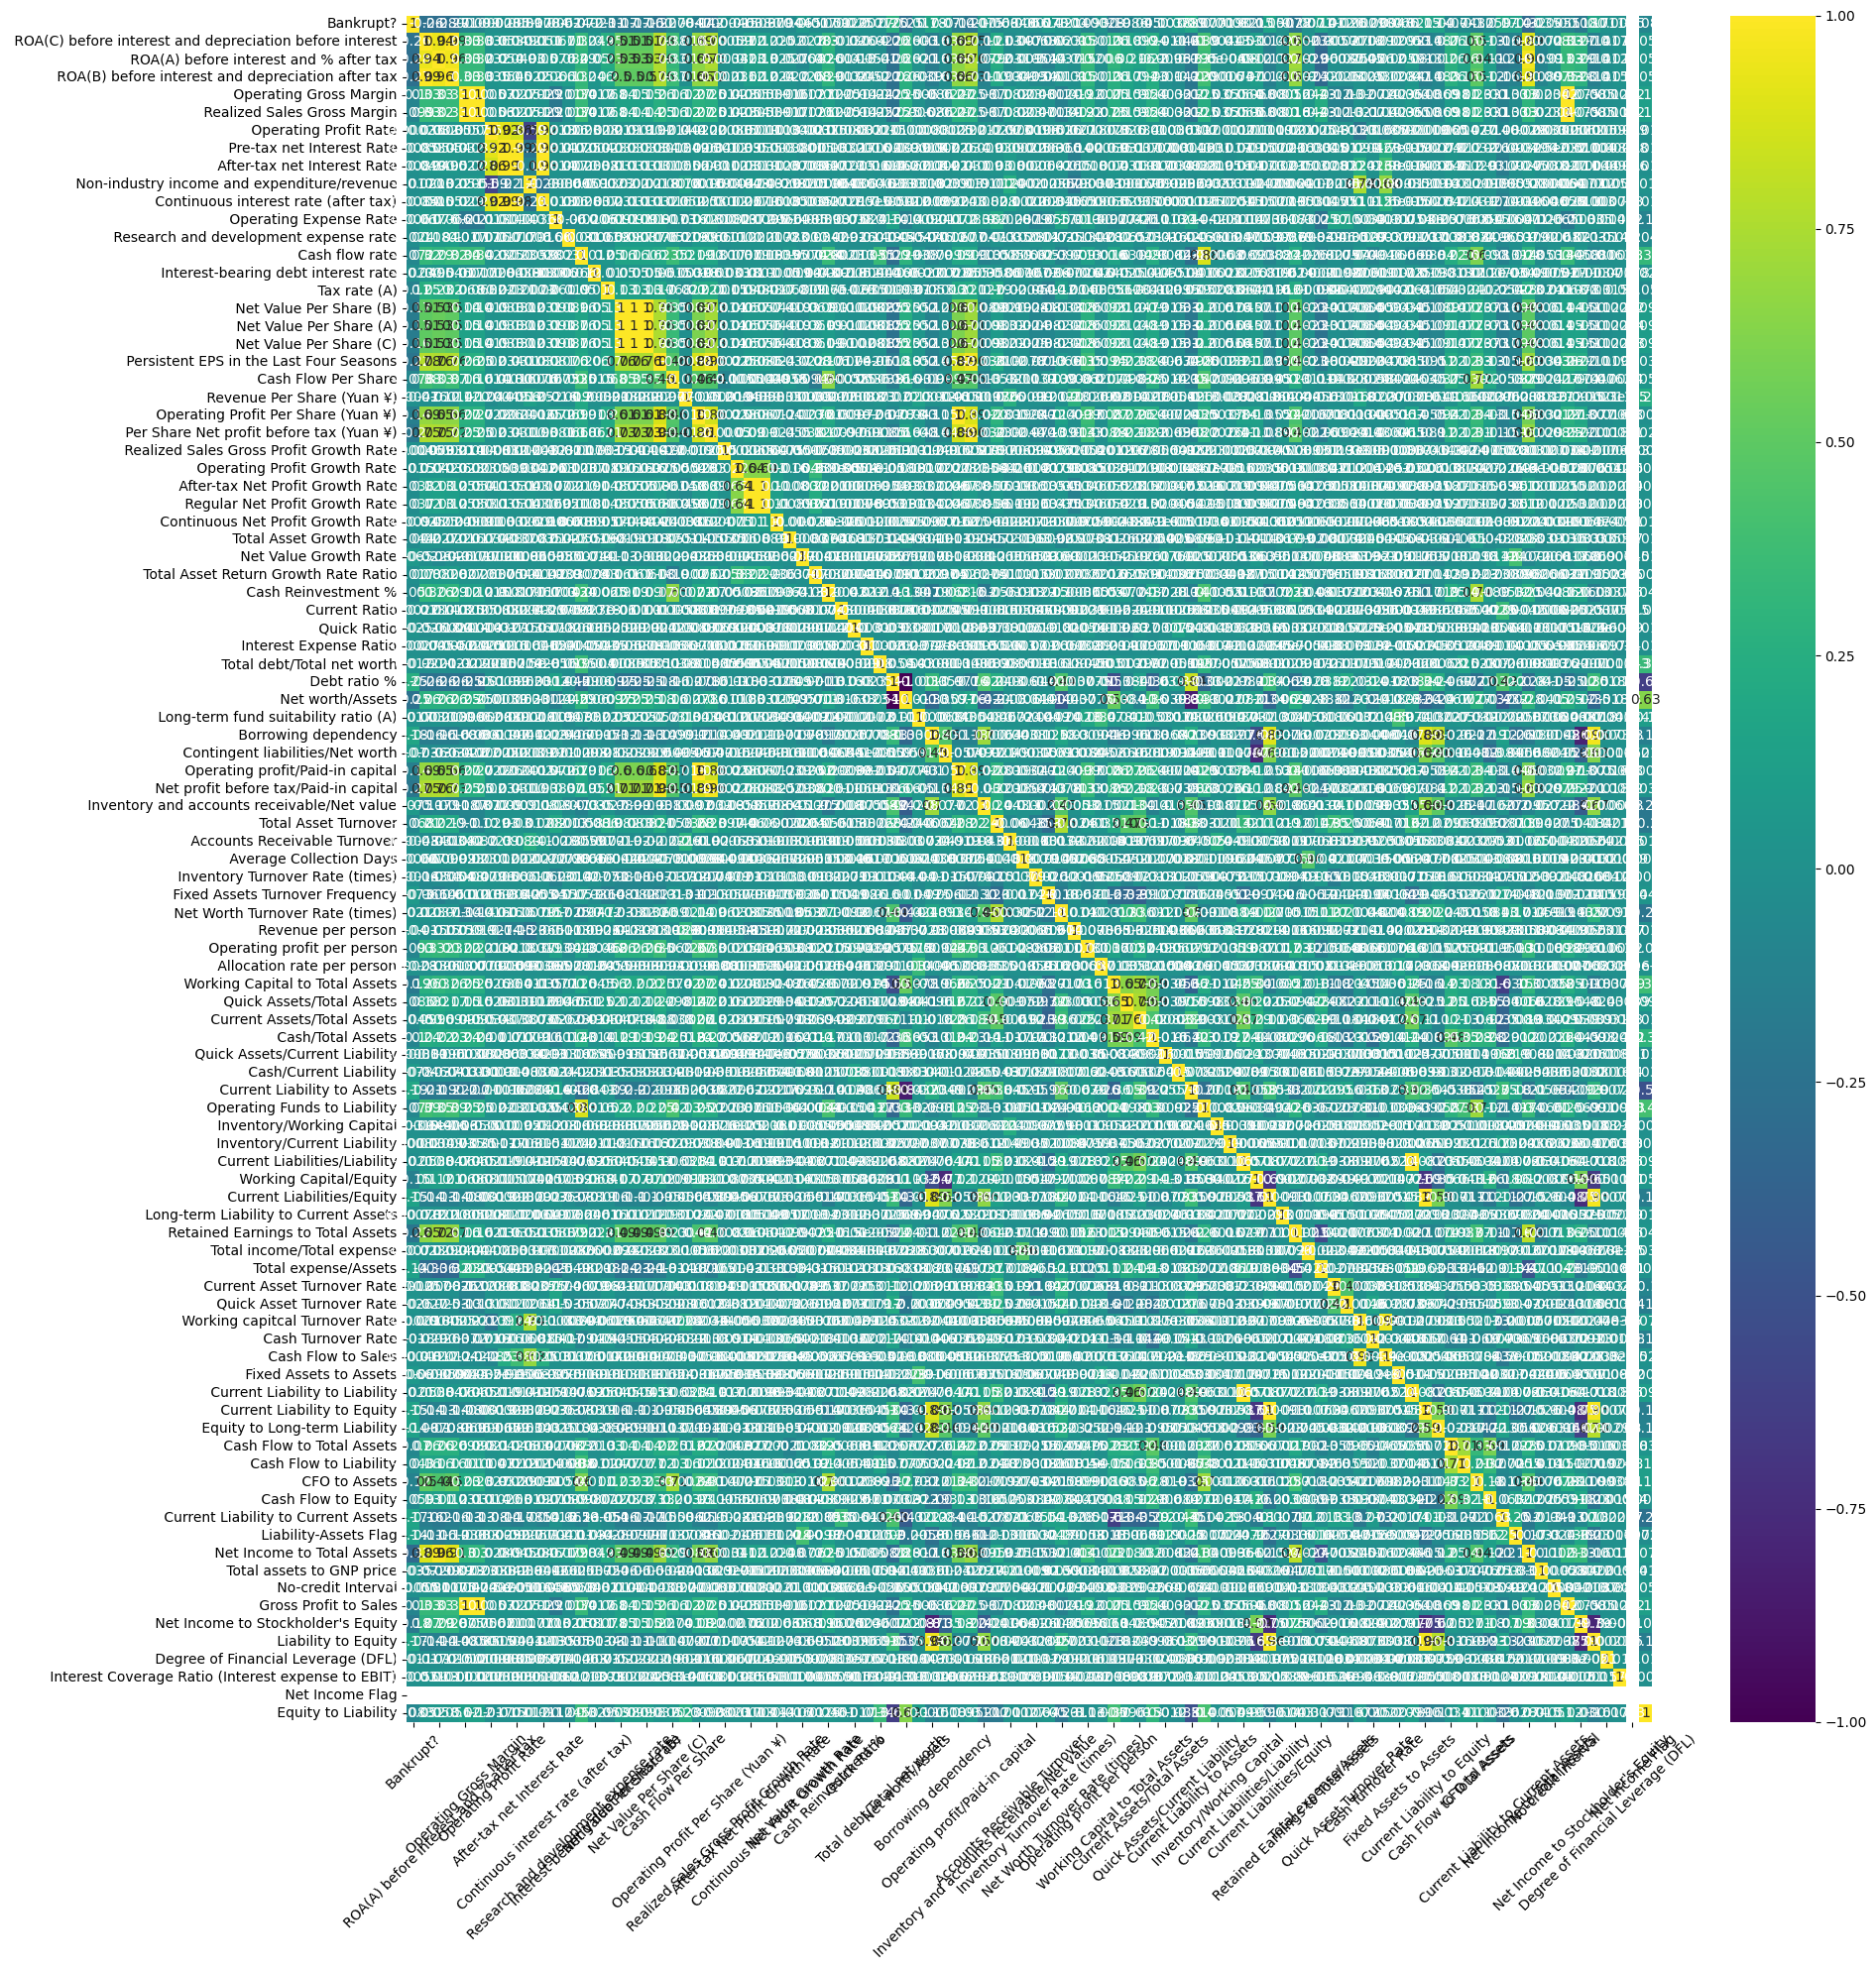

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = df = pd.read_csv("data.csv")

# Assuming 'df' is a pandas DataFrame object
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

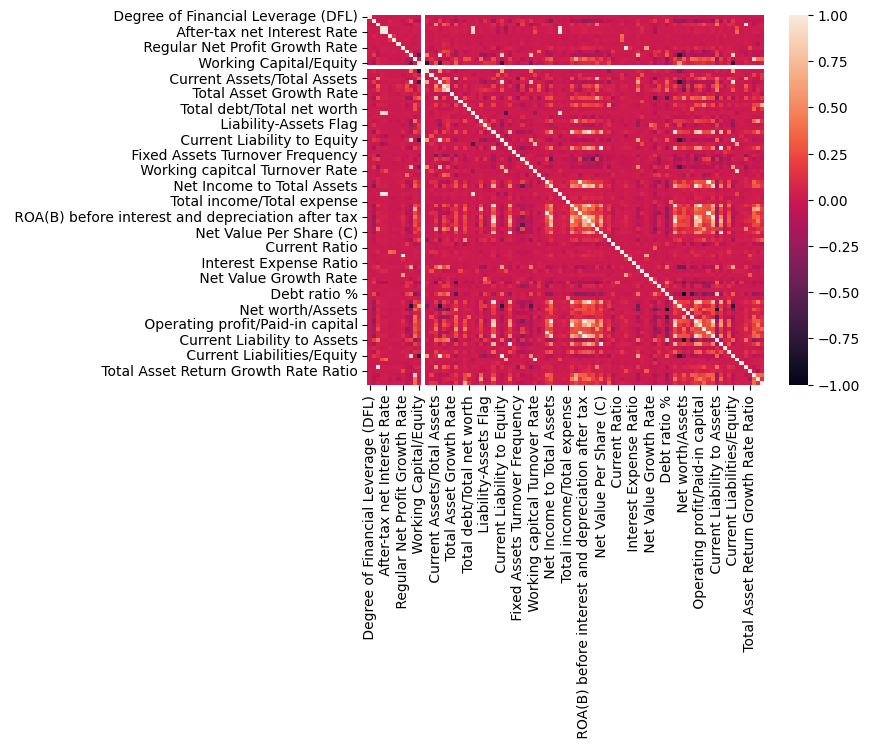

In [18]:
#correlation excluding the intigers as they dont correlate as not numerical
numerical = list(set(df.columns) - {
        "Liability-Assets Flag",
        "Net Income Flag",    })
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);